In [51]:
# fetch and load data 
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

In [21]:
housing = load_housing_data()

In [22]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [25]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [24]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [28]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

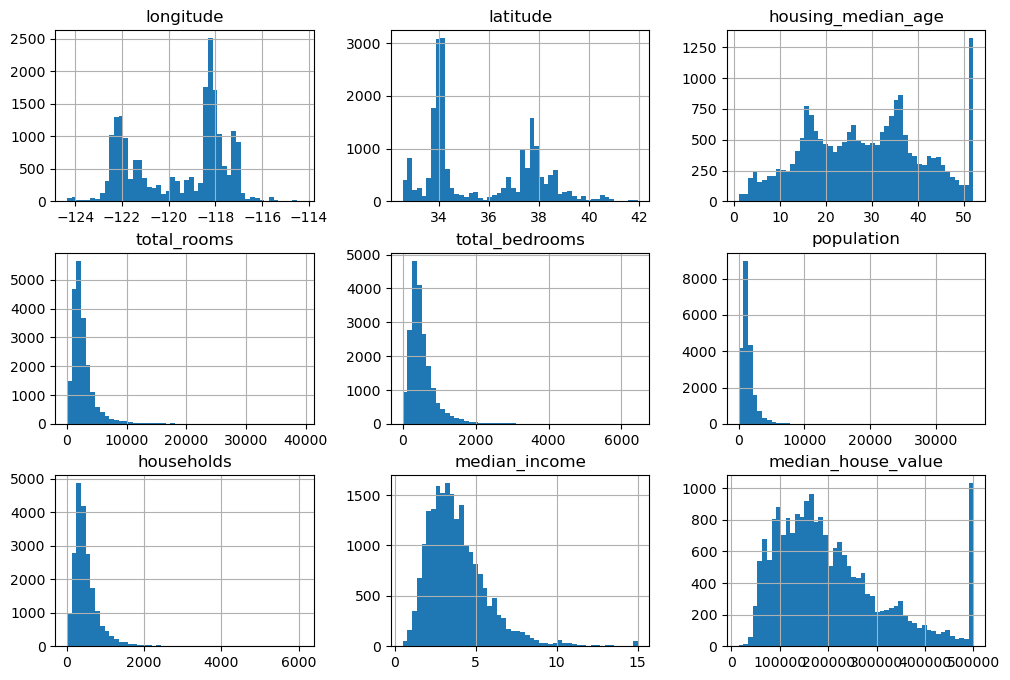

In [30]:
# plotting histogram 
housing.hist(bins=50, figsize=(12,8));

In [31]:
# Test dataset 

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [32]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


In [33]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,263300.0,<1H OCEAN
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,266800.0,NEAR OCEAN
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,500001.0,<1H OCEAN
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,72300.0,INLAND


In [34]:
# make a category of income
housing['median_income'].value_counts()

median_income
3.1250     49
15.0001    49
2.8750     46
2.6250     44
4.1250     44
           ..
4.0774      1
4.1767      1
6.1814      1
6.4319      1
2.0943      1
Name: count, Length: 12928, dtype: int64

In [44]:
housing['income_cat'] = pd.cut(housing['median_income'], bins = [0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1,2,3,4,5])

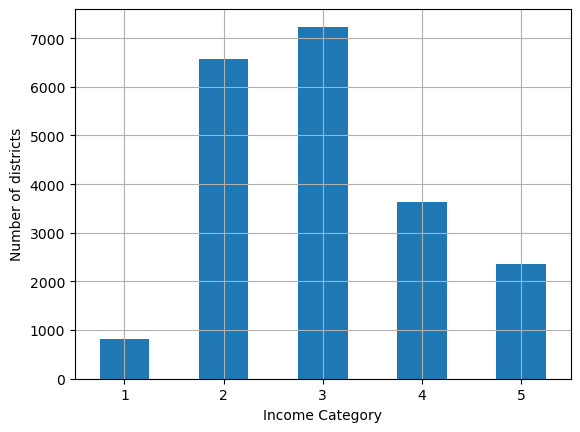

In [52]:
housing['income_cat'].value_counts().sort_index().plot.bar(rot = 0, grid = True)
plt.xlabel("Income Category")
plt.ylabel("Number of districts")
plt.show()

In [62]:
# startified sampling 

strat_test_set, strat_train_set = train_test_split(housing, test_size=0.2, random_state=42, stratify=housing['income_cat'])

In [57]:
start_test_set['income_cat'].value_counts()/len(start_test_set)

income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [63]:
for set_ in (strat_test_set, strat_train_set):
    set_.drop("income_cat", axis = 1, inplace=True)

In [64]:
start_test_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

### Explore and visualize dataset to gain insight

In [65]:
df = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

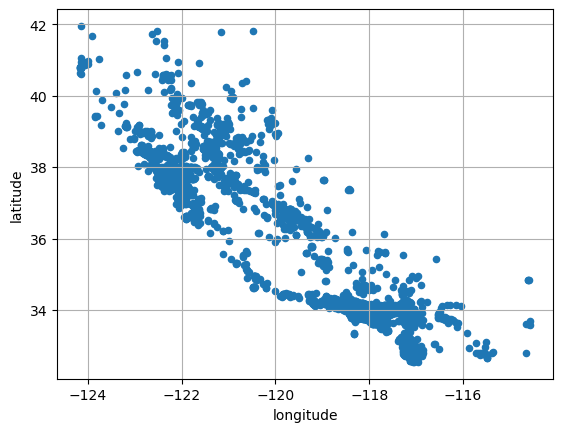

In [68]:
df.plot(kind = 'scatter', x = 'longitude', y = 'latitude', grid = True)

<Axes: xlabel='longitude', ylabel='latitude'>

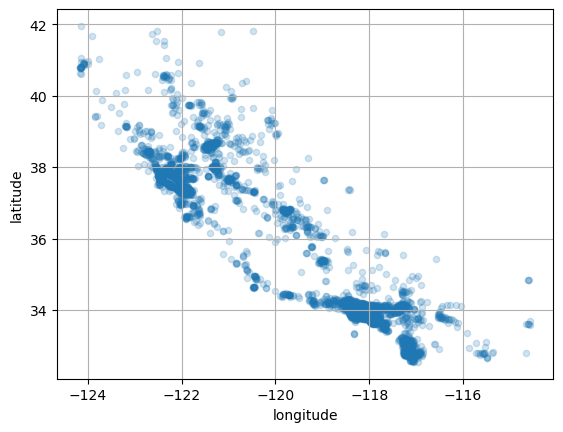

In [69]:
# setting alpha for high density of data
df.plot(kind = 'scatter', x = 'longitude', y = 'latitude', grid = True, alpha = 0.2)

<Axes: xlabel='longitude', ylabel='latitude'>

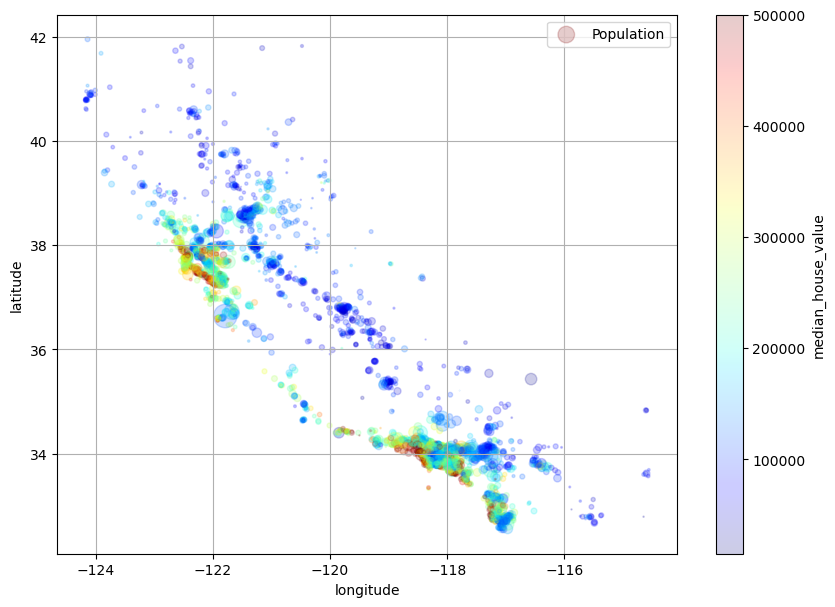

In [70]:
df.plot(kind = 'scatter', x = 'longitude', y = 'latitude', grid = True, alpha = 0.2, 
       s = df['population']/100, label = 'Population', 
       c = 'median_house_value', cmap = 'jet', colorbar = True, legend = True, sharex= True, figsize=(10,7))

In [79]:
# Pearson r correlation 
# df.drop("ocean_proximity", axis =1 , inplace = True)
corr_matrix = df.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691867
total_rooms           0.131296
housing_median_age    0.071210
households            0.070947
total_bedrooms        0.057247
population           -0.016164
longitude            -0.039848
latitude             -0.150336
Name: median_house_value, dtype: float64

In [77]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

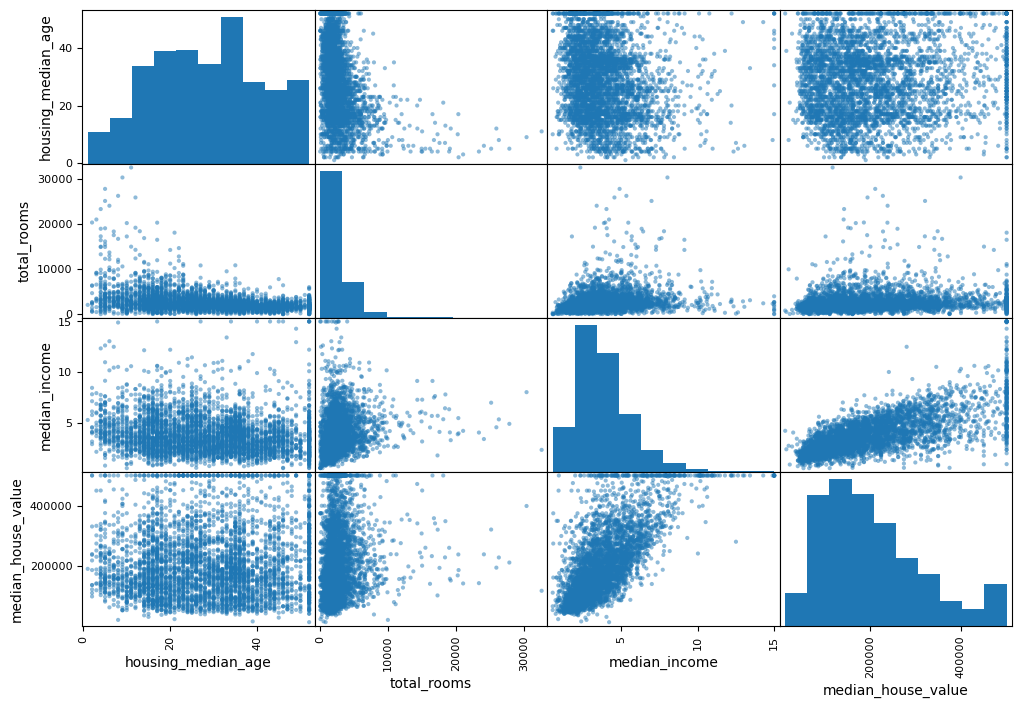

In [84]:
# scatter matrix 

from pandas.plotting import scatter_matrix
attributes = ['housing_median_age', 'total_rooms','median_income',
       'median_house_value']
scatter_matrix(df[attributes], figsize = (12, 8))
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

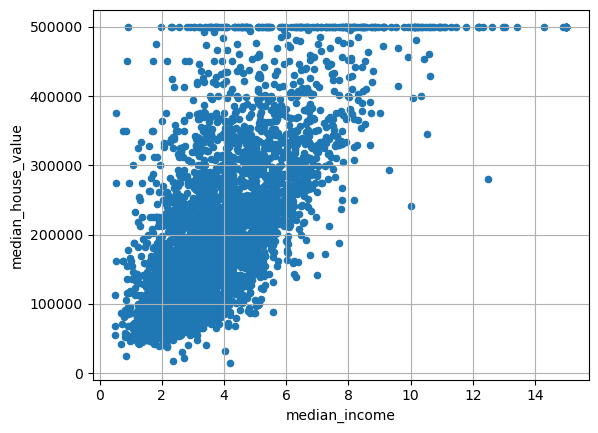

In [88]:
df.plot(kind= 'scatter', y = 'median_house_value', x='median_income', grid = True)

In [90]:
df['rooms_per_house'] = df['total_rooms']/df['households']
df['beedroom_ratio'] = df['total_bedrooms']/ df['total_rooms']
df['people_per_house'] = df['population']/df['households']

In [92]:
corr_matrix = df.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691867
rooms_per_house       0.192731
total_rooms           0.131296
housing_median_age    0.071210
households            0.070947
total_bedrooms        0.057247
population           -0.016164
longitude            -0.039848
people_per_house     -0.134999
latitude             -0.150336
beedroom_ratio       -0.240481
Name: median_house_value, dtype: float64

In [93]:
# copy 

housing = strat_train_set.drop("median_house_value", axis = 1)
housing_label = strat_train_set['median_house_value'].copy()

In [101]:
## clean the Data
# imputation setting some value for missing value in dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 5241 to 3965
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4079 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   ocean_proximity     4128 non-null   object 
dtypes: float64(8), object(1)
memory usage: 322.5+ KB


In [102]:
median = housing['total_bedrooms'].median()
median

442.0

In [103]:
housing['total_bedrooms'].fillna(median, inplace= True)

In [104]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 5241 to 3965
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4128 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   ocean_proximity     4128 non-null   object 
dtypes: float64(8), object(1)
memory usage: 322.5+ KB


In [108]:
# Simple imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [109]:
housing_num = housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [110]:
imputer.statistics_

array([-118.46  ,   34.22  ,   28.    , 2159.5   ,  442.    , 1172.5   ,
        416.    ,    3.5132])

In [113]:
housing_num.median().values

array([-118.46  ,   34.22  ,   28.    , 2159.5   ,  442.    , 1172.5   ,
        416.    ,    3.5132])

In [114]:
# use the trained imputer to replace the all missing value 

X = imputer.transform(housing_num)

In [115]:
X

array([[-118.39  ,   34.12  ,   29.    , ..., 2184.    ,  960.    ,
           8.2816],
       [-120.42  ,   34.89  ,   24.    , ...,  855.    ,  283.    ,
           5.0099],
       [-118.45  ,   34.25  ,   36.    , ...,  808.    ,  275.    ,
           4.3839],
       ...,
       [-119.72  ,   34.44  ,   43.    , ...,  663.    ,  358.    ,
           4.7   ],
       [-117.91  ,   33.63  ,   30.    , ..., 1081.    ,  412.    ,
           4.9125],
       [-118.56  ,   34.19  ,   36.    , ..., 1246.    ,  426.    ,
           4.1111]])

In [116]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index = housing_num.index)

### Handling Text and Categorical Data 

In [117]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
5241,<1H OCEAN
17352,<1H OCEAN
3505,<1H OCEAN
7777,<1H OCEAN
14155,NEAR OCEAN


In [120]:
# converting categorical to number 
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [122]:
housing_cat_encoded[:8]

array([[0.],
       [0.],
       [0.],
       [0.],
       [4.],
       [0.],
       [3.],
       [4.]])

In [123]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [126]:
# one hot encoding 
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [128]:
housing_cat_1hot[:8] #sparse matrix

<8x5 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [129]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [130]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [132]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

### Feature scaling and Transformation

In [135]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Min max scaler 0-1
min_max_scaler = MinMaxScaler()
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)
# Standarized scaler
std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

In [136]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_label.to_frame())

model = LinearRegression()
model.fit(housing[['median_income']], scaled_labels)
some_new_data = housing[['median_income']].iloc[:5]

scaled_prediction = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_prediction)

In [141]:
predictions, scaled_prediction

(array([[392541.49844167],
        [255020.20815687],
        [228707.18198752],
        [181919.59504006],
        [227404.14075549]]),
 array([[ 1.63173701],
        [ 0.42713041],
        [ 0.19664359],
        [-0.21318849],
        [ 0.1852297 ]]))

In [138]:
some_new_data

,median_income
5241,8.2816
17352,5.0099
3505,4.3839
7777,3.2708
14155,4.3529


In [139]:
from sklearn.compose import TransformedTargetRegressor
model = TransformedTargetRegressor(LinearRegression(), transformer=StandardScaler())
model.fit(housing[['median_income']], scaled_labels)
prediction = model.predict(some_new_data)

In [140]:
prediction

array([[ 1.63173701],
       [ 0.42713041],
       [ 0.19664359],
       [-0.21318849],
       [ 0.1852297 ]])